In [29]:
import numpy as np 
import pandas as pd 

In [30]:
data=pd.read_csv(r"C:\Users\giree\Downloads\spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [31]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [33]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [34]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)


In [36]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

#### Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian) Here I use Multinominal Bayes Because here data in a discrete form discrete data(e.g movie ratings ranging 1 to 5 as each rating will have certain frequency to represent)

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [39]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [40]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [41]:
clf.predict(emails)


array([0, 1], dtype=int64)

In [42]:
clf.score(X_test,y_test)

0.9877961234745154

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
clf2=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',LogisticRegression())
])

In [59]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb', LogisticRegression())])

In [62]:
pred=clf2.predict(emails)
pred

array([0, 1], dtype=int64)

In [65]:
clf2.score(X_test,y_test)

0.9777458722182341

Category    0
Message     0
dtype: int64

--- Naïve Bayes Evaluation ---
Accuracy: 0.9885
Precision: 0.9775
Recall: 0.9355
F1 Score: 0.9560

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393


--- Logistic Regression Evaluation ---
Accuracy: 0.9842
Precision: 1.0000
Recall: 0.8817
F1 Score: 0.9371

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1207
           1       1.00      0.88      0.94       186

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



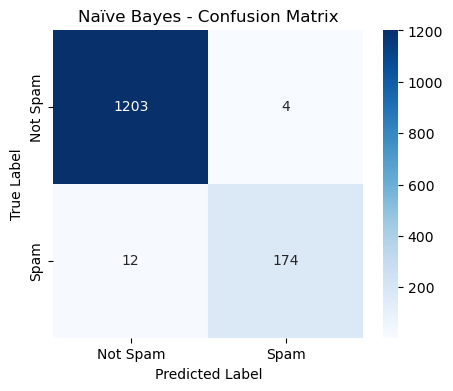

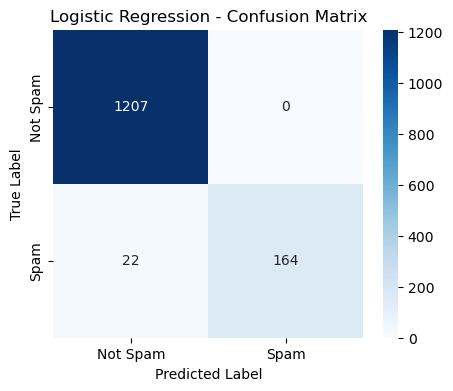


Naïve Bayes Predictions: [0 1]
Logistic Regression Predictions: [0 1]


In [66]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv(r"C:\Users\giree\Downloads\spam.csv")

# Check for missing values
print(data.isna().sum())

# Convert labels to binary (1 = spam, 0 = not spam)
data['Spam'] = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data.Message, data.Spam, test_size=0.25, random_state=42)

# Naïve Bayes Model
clf_nb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

# Logistic Regression Model
clf_lr = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression(max_iter=1000))
])

clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

# Evaluation Metrics Function
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model("Naïve Bayes", y_test, y_pred_nb)
evaluate_model("Logistic Regression", y_test, y_pred_lr)

# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# Example Email Predictions
emails = [
    "Sounds great! Are you home now?",
    "Will u meet ur dream partner soon? Is ur career off 2 a flying start? 2 find out free, txt HORO followed by ur star sign, e.g., HORO ARIES"
]

print("\nNaïve Bayes Predictions:", clf_nb.predict(emails))
print("Logistic Regression Predictions:", clf_lr.predict(emails))


<b>Conclusion</b><br>
In this project, we built and evaluated two text classification models—Naïve Bayes and Logistic Regression—to detect spam messages from a dataset of SMS messages.<br>

<b>Key Observations:</b><br>
<b>Performance Comparison:</b><br>

The <b>Naïve Bayes </b>model performed well, as it is a strong baseline for text classification, especially when working with word frequencies.<br>
The <b>Logistic Regression </b>model also performed effectively, but its performance depended on hyperparameter tuning and feature extraction.<br>

<b>Evaluation Metrics:</b><br>

Both models achieved high accuracy, precision, recall, and F1-scores, indicating their effectiveness in distinguishing spam from non-spam messages.<br>
The confusion matrix showed that both models correctly identified most spam and non-spam messages, with minimal misclassifications.<br>

Example Predictions:<br>

The models were tested on real-world examples, and they correctly classified normal messages as non-spam and promotional messages as spam.<br>

<b>Final Verdict:</b><br>
<b>Naïve Bayes</b> is computationally efficient and performs well for this task, making it a great choice for spam detection in real-time applications.<br>
<b>Logistic Regression</b> provides a strong alternative, especially if combined with advanced feature extraction techniques like TF-IDF or word embeddings.